First 5 rows of dataset:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 



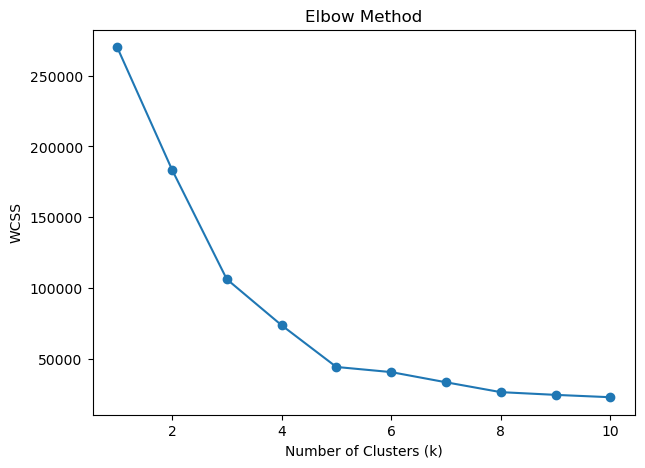

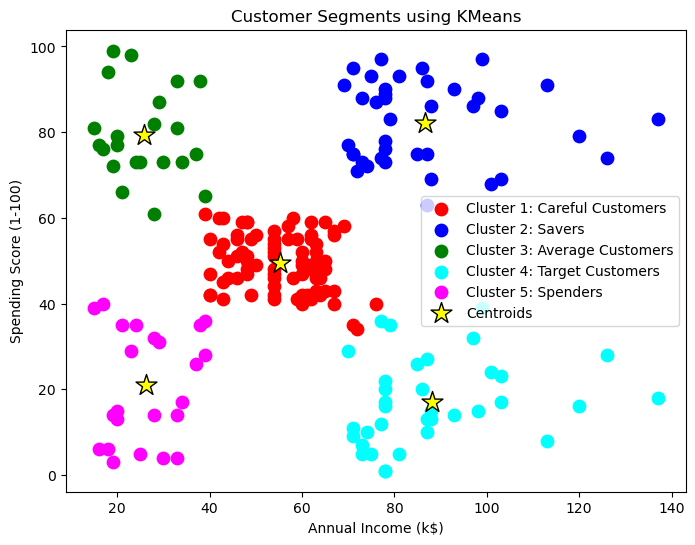

Business Meaning of Clusters:
Cluster 1 (Red)     : Low income, low spending → Careful Customers
Cluster 2 (Blue)    : High income, low spending → Savers
Cluster 3 (Green)   : Medium income, medium spending → Average Customers
Cluster 4 (Cyan)    : High income, high spending → Target Customers 🎯
Cluster 5 (Magenta) : Low income, high spending → Spenders


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset (make sure Mall_Customers.csv is in the same folder)
df = pd.read_csv("/home/user/Downloads/Task2/Mall_Customers.csv")

print("First 5 rows of dataset:\n", df.head(), "\n")

# Select features: Annual Income and Spending Score
X = df.iloc[:, [3, 4]].values

#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


# Train KMeans with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


#Visualiazing Clusters
plt.figure(figsize=(8,6))

# Each cluster in different color
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1: Careful Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2: Savers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3: Average Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Cluster 4: Target Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='Cluster 5: Spenders')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='yellow', marker='*', edgecolor='black', label='Centroids')

plt.title("Customer Segments using KMeans")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


#Business Interpretation
print("Business Meaning of Clusters:")
print("Cluster 1 (Red)     : Low income, low spending → Careful Customers")
print("Cluster 2 (Blue)    : High income, low spending → Savers")
print("Cluster 3 (Green)   : Medium income, medium spending → Average Customers")
print("Cluster 4 (Cyan)    : High income, high spending → Target Customers 🎯")
print("Cluster 5 (Magenta) : Low income, high spending → Spenders")
